In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [ ]:
#Cargamos el archivo airbnb.csv
data= pd.read_csv('airbnb.csv', encoding='ISO-8859-1')
data

*****3. Aplicar los siguientes métodos para reemplazar valores nulos en cada columna:*****

In [ ]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

In [ ]:
#“host_name”: Rellenar con el objeto "anterior" de la columna
data["host_name"] =data["host_name"].fillna(method="bfill") 
data

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data["neighbourhood"] =data["neighbourhood"].fillna(method="ffill") 
data

#“latitude ”: Rellenar con el valor de “Media” de la columna
mean_latitude=data['latitude'].mean() 
data['latitude'].fillna(value=mean_latitude, inplace=True) 

#“longitude”: Rellenar con el valor de “Mediana” de la columna
mean_longitude=data['longitude'].median() 
data['longitude'].fillna(value=mean_longitude, inplace=True) 

#“room_type”: Rellenar con el string “Private room”
data["room_type"] =data["room_type"].fillna("Private_room") 
data

#“price”: Rellenar con el valor de “Media” de la columna
mean_price=data['price'].mean() 
data['price'].fillna(value=mean_price, inplace=True) 

#“minimum_nights”: Rellenar con el valor de “1”
data["minimum_nights"] =data["minimum_nights"].fillna(1) 
data

#"number_of_reviews": Rellenar con el valor de “0”
data["number_of_reviews"] =data["number_of_reviews"].fillna(0) 
data

#"last_review":Rellenar con el objeto "31/12/2022" de la columna
data["last_review"] =data["last_review"].fillna("31/12/2022") 
data

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
mean_reviews_per_month=data['reviews_per_month'].mean() 
data['reviews_per_month'].fillna(value=mean_reviews_per_month, inplace=True) 

#"calculated_host_listings_count": Rellenar con el valor de “1”
data["calculated_host_listings_count"] =data["calculated_host_listings_count"].fillna(1) 
data

#"availability_365" y "number of reviews ltm": Rellenar con el objeto "anterior" de cada columna respectivamente.
data["availability_365"] =data["availability_365"].fillna(method="bfill") 
data

data["number_of_reviews_ltm"] =data["number_of_reviews_ltm"].fillna(method="bfill") 
data

#Se elimina la columna "neighbourhood_group " ya que no existe ningún valor para los 21669 datos
data=data.drop(['neighbourhood_group'],axis=1)

#Se rellena la comuna "name" con el texto "Hermoso depa en Cancún"
data["name"] =data["name"].fillna("Hermoso depa en Cancún") 
data


In [ ]:
#Vemos que ya no tenemps valores nulos en nuestro dataframe
valores_nulos=data.isnull().sum().sum()
valores_nulos

*****4 y 5.-Aplicar método de distribución normal y desviación Estandar*****

*****Desviación Estandar*****

In [ ]:
#Variable latitude

y=data["latitude"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

#Encontramos Ouliers
outliers_latitude= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_latitude

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #dibujamos el diagrama

In [ ]:
#Variable longitude

y2=data["longitude"]
Limite_Superior2= y2.mean() + 3*y2.std()
Limite_Inferior2= y2.mean() - 3*y2.std()
print("Limite superior permitido", Limite_Superior2)
print("Limite inferior permitido", Limite_Inferior2)

#Encontramos Ouliers
outliers_longitude= data[(y2>Limite_Superior2)|(y2<Limite_Inferior2)]
outliers_longitude

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #dibujamos el diagrama

In [ ]:
#Variable minimum_nights

y3=data["minimum_nights"]
Limite_Superior3= y3.mean() + 3*y3.std()
Limite_Inferior3= y3.mean() - 3*y3.std()
print("Limite superior permitido", Limite_Superior3)
print("Limite inferior permitido", Limite_Inferior3)

#Encontramos Ouliers
outliers_minimum_nights= data[(y3>Limite_Superior3)|(y3<Limite_Inferior3)]
outliers_minimum_nights

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #dibujamos el diagrama

In [ ]:
#Variable price

y4=data["price"]
Limite_Superior4= y4.mean() + 3*y4.std()
Limite_Inferior4= y4.mean() - 3*y4.std()
print("Limite superior permitido", Limite_Superior4)
print("Limite inferior permitido", Limite_Inferior4)

#Encontramos Ouliers
outliers_price= data[(y4>Limite_Superior4)|(y4<Limite_Inferior4)]
outliers_price

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() #dibujamos el diagrama

In [ ]:
# Variable number_of_reviews

y5=data["number_of_reviews"]
Limite_Superior5= y5.mean() + 3*y5.std()
Limite_Inferior5= y5.mean() - 3*y5.std()
print("Limite superior permitido", Limite_Superior5)
print("Limite inferior permitido", Limite_Inferior5)

#Encontramos Ouliers
outliers_number_of_reviews= data[(y5>Limite_Superior5)|(y5<Limite_Inferior5)]
outliers_number_of_reviews

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #dibujamos el diagrama

In [ ]:
# variable reviews_per_month

y6=data["reviews_per_month"]
Limite_Superior6= y6.mean() + 3*y6.std()
Limite_Inferior6= y6.mean() - 3*y6.std()
print("Limite superior permitido", Limite_Superior6)
print("Limite inferior permitido", Limite_Inferior6)

#Encontramos Ouliers
outliers_reviews_per_month= data[(y6>Limite_Superior6)|(y6<Limite_Inferior6)]
outliers_reviews_per_month

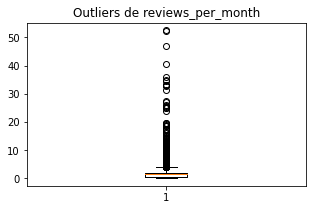

In [41]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #dibujamos el diagrama

In [ ]:
#Variable availability_365

y7=data["availability_365"]
Limite_Superior7= y7.mean() + 3*y7.std()
Limite_Inferior7= y7.mean() - 3*y7.std()
print("Limite superior permitido", Limite_Superior7)
print("Limite inferior permitido", Limite_Inferior7)

#Encontramos Ouliers
outliers_availability_365= data[(y7>Limite_Superior7)|(y7<Limite_Inferior7)]
outliers_availability_365


In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #dibujamos el diagrama

*****rango intercuartílico*****

In [ ]:
#latitude

y8=data["latitude"]

percentile258=y8.quantile(0.25) #Q1
percentile758=y8.quantile(0.75) #Q3
iqr8= percentile758 - percentile258

Limite_Superior_iqr8= percentile758 + 1.5*iqr8
Limite_Inferior_iqr8= percentile258 - 1.5*iqr8
print("Limite superior permitido", Limite_Superior_iqr8)
print("Limite inferior permitido", Limite_Inferior_iqr8)

outliers_iqrlatitude= data[(y8>Limite_Superior_iqr8)|(y8<Limite_Inferior_iqr8)]
outliers_iqrlatitude

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #dibujamos el diagrama

In [ ]:
#longitude

y9=data["longitude"]

percentile259=y9.quantile(0.25) #Q1
percentile759=y9.quantile(0.75) #Q3
iqr9= percentile759 - percentile259

Limite_Superior_iqr9= percentile759 + 1.5*iqr9
Limite_Inferior_iqr9= percentile259 - 1.5*iqr9
print("Limite superior permitido", Limite_Superior_iqr9)
print("Limite inferior permitido", Limite_Inferior_iqr9)

outliers_iqr9= data[(y9>Limite_Superior_iqr9)|(y9<Limite_Inferior_iqr9)]
outliers_iqr9

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #dibujamos el diagrama

In [ ]:
#price

y10=data["price"]

percentile2510=y10.quantile(0.25) #Q1
percentile7510=y10.quantile(0.75) #Q3
iqr10= percentile7510 - percentile2510

Limite_Superior_iqr10= percentile7510 + 1.5*iqr10
Limite_Inferior_iqr10= percentile2510 - 1.5*iqr10
print("Limite superior permitido", Limite_Superior_iqr10)
print("Limite inferior permitido", Limite_Inferior_iqr10)

outliers_iqr10= data[(y10>Limite_Superior_iqr10)|(y10<Limite_Inferior_iqr10)]
outliers_iqr10

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["price"]) 
plt.title("Outliers de price")
plt.show() #dibujamos el diagrama

In [ ]:
#minimum_nights

y11=data["minimum_nights"]

percentile2511=y11.quantile(0.25) #Q1
percentile7511=y11.quantile(0.75) #Q3
iqr11= percentile7511 - percentile2511

Limite_Superior_iqr11= percentile7511 + 1.5*iqr11
Limite_Inferior_iqr11= percentile2511 - 1.5*iqr11
print("Limite superior permitido", Limite_Superior_iqr11)
print("Limite inferior permitido", Limite_Inferior_iqr11)

outliers_iqr11= data[(y11>Limite_Superior_iqr11)|(y11<Limite_Inferior_iqr11)]
outliers_iqr11

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #dibujamos el diagrama

In [ ]:
#number_of_reviews

y12=data["number_of_reviews"]

percentile2512=y12.quantile(0.25) #Q1
percentile7512=y12.quantile(0.75) #Q3
iqr12= percentile7512 - percentile2512

Limite_Superior_iqr12= percentile7512 + 1.5*iqr12
Limite_Inferior_iqr12= percentile2512 - 1.5*iqr12
print("Limite superior permitido", Limite_Superior_iqr12)
print("Limite inferior permitido", Limite_Inferior_iqr12)

outliers_iqr12= data[(y12>Limite_Superior_iqr12)|(y12<Limite_Inferior_iqr12)]
outliers_iqr12

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #dibujamos el diagrama

In [ ]:
#reviews_per_month

y13=data["reviews_per_month"]

percentile2513=y13.quantile(0.25) #Q1
percentile7513=y13.quantile(0.75) #Q3
iqr13= percentile7513 - percentile2513

Limite_Superior_iqr13= percentile7513 + 1.5*iqr13
Limite_Inferior_iqr13= percentile2513 - 1.5*iqr13
print("Limite superior permitido", Limite_Superior_iqr13)
print("Limite inferior permitido", Limite_Inferior_iqr13)

outliers_iqr13= data[(y13>Limite_Superior_iqr13)|(y13<Limite_Inferior_iqr13)]
outliers_iqr13

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #dibujamos el diagrama

In [ ]:
#availability_365

y14=data["availability_365"]

percentile2514=y14.quantile(0.25) #Q1
percentile7514=y14.quantile(0.75) #Q3
iqr14= percentile7513 - percentile2513

Limite_Superior_iqr14= percentile7514 + 1.5*iqr14
Limite_Inferior_iqr14= percentile2514 - 1.5*iqr14
print("Limite superior permitido", Limite_Superior_iqr14)
print("Limite inferior permitido", Limite_Inferior_iqr14)

outliers_iqr14= data[(y14>Limite_Superior_iqr14)|(y14<Limite_Inferior_iqr14)]
outliers_iqr14

In [ ]:
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #dibujamos el diagrama

*****Elección de metodo de sustitución de outliers*****

In [ ]:
#Realizamos una copia del dataframe
data2=data.copy()

In [ ]:
#Primera sustitución: latitude
#Desviación estándar
#data3=data2[(y<=Limite_Superior)&(y>=Limite_Inferior)] 
#data3["latitude"]=data3["latitude"].fillna(round(data2["latitude"].mean(),2))

#No se ve influenciada por valores extremos, ya que solo influyen los valores centrales.

In [ ]:
#Segunda sustitución: longitude
#Desviación estándar
#data3=data2[(y2<=Limite_Superior2)&(y2>=Limite_Inferior2)] 
#data3["longitude"]=data3["longitude"].fillna(round(data2["longitude"].mean(),0))

#No se ve influenciada por valores extremos, ya que solo influyen los valores centrales.

In [37]:
#Tercera sustitución: price
#Desviación estándar
data3=data2[(y4<=Limite_Superior4)&(y4>=Limite_Inferior4)] 
data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6067/2155290536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["price"]=data3["price"].fillna(round(data2["price"].mean(),2))


In [38]:
#Cuarta sustitución: minimum_nights
#Desviación Estandar
data3=data2[(y3<=Limite_Superior3)&(y3>=Limite_Inferior3)] 
data3["minimum_nights"]=data3["minimum_nights"].fillna(round(data2["minimum_nights"].median(),2))
#Sesgo hacia arriba
 #(Valores enteros)

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6067/1323204753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["minimum_nights"]=data3["minimum_nights"].fillna(round(data2["minimum_nights"].median(),2))


In [39]:
#Quinta sustitución: number_of_reviews
#Desviación Estandar
data3=data2[(y5<=Limite_Superior5)&(y5>=Limite_Inferior5)] 
data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(data2["number_of_reviews"].median(),2))
#Sesgo hacia arriba mas notorio pero los valores estan mas agrupados
 #(Valores enteros)

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6067/1583002292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["number_of_reviews"]=data3["number_of_reviews"].fillna(round(data2["number_of_reviews"].median(),2))


In [43]:
#Sexta sustitución: reviews_per_month
#Desviación Estandar
data3=data2[(y6<=Limite_Superior6)&(y6>=Limite_Inferior6)] 
data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),2))
#Sesgo hacia arriba mas notorio pero los valores estan mas agrupados

/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_6067/1671661840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["reviews_per_month"]=data3["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),2))


In [ ]:
#Septima sustitución: availability_365
#Desviación Estandar
data3=data2[(y7<=Limite_Superior7)&(y7>=Limite_Inferior7)] 
data3["availability_365"]=data3["availability_365"].fillna(round(data2["availability_365"].mode(),2))

In [ ]:
data3

In [ ]:
data3.to_csv("airbnb_clean.csv")